Reference: 

1) https://facebook.github.io/prophet/docs/quick_start.html

2) https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

3) https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/

4) https://www.kdnuggets.com/2018/11/sales-forecasting-using-prophet.html

5) https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-part-3-predicting-the-future-with-facebook-prophet-3f3af145cdc

6) https://mode.com/example-gallery/forecasting_prophet_python_cookbook

7) https://www.kaggle.com/armamut/predicting-transactions-fb-prophet-tutorial

# 0.0. Imports

In [2]:
import pandas as pd
from fbprophet import Prophet

## 0.1. Read dataset

In [21]:
df1 = pd.read_csv( '/home/meigarom/Downloads/revenue_BF2019.csv', low_memory=False )
df1.columns = ['ds', 'y']
df1 = df1.sort_values( 'ds' )

In [22]:
df1.head()

,ds,y
1120,2016-01-01,6381.32
1045,2016-01-02,13247.27
1002,2016-01-03,18065.85
1003,2016-01-04,27673.29
1307,2016-01-05,29653.49


In [23]:
m = Prophet()

In [24]:
m.fit( df1 )

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe( periods=2 )

In [28]:
future.tail()

,ds
1425,2019-11-26
1426,2019-11-27
1427,2019-11-28
1428,2019-11-29
1429,2019-11-30


In [29]:
forecast = m.predict( future )

In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1425,2019-11-26,622786.917030,507144.962648,744279.834528
1426,2019-11-27,640095.637518,522605.286393,748838.331051
1427,2019-11-28,629645.117715,518007.255223,745695.112160
1428,2019-11-29,624337.821339,509980.136493,731153.419966
1429,2019-11-30,580361.068647,464467.381045,704617.413629


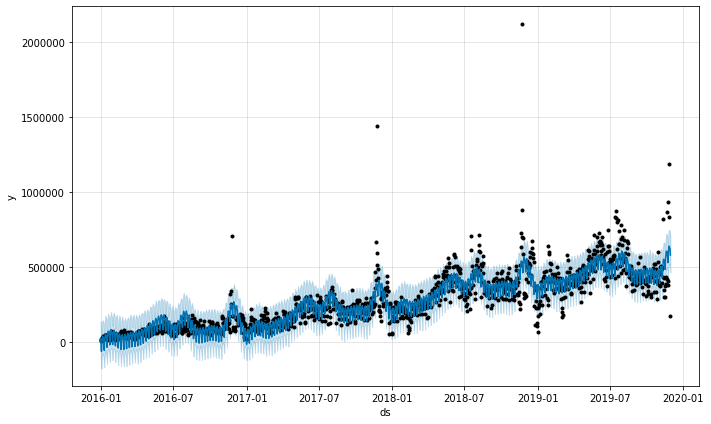

In [31]:
fig1 = m.plot( forecast )

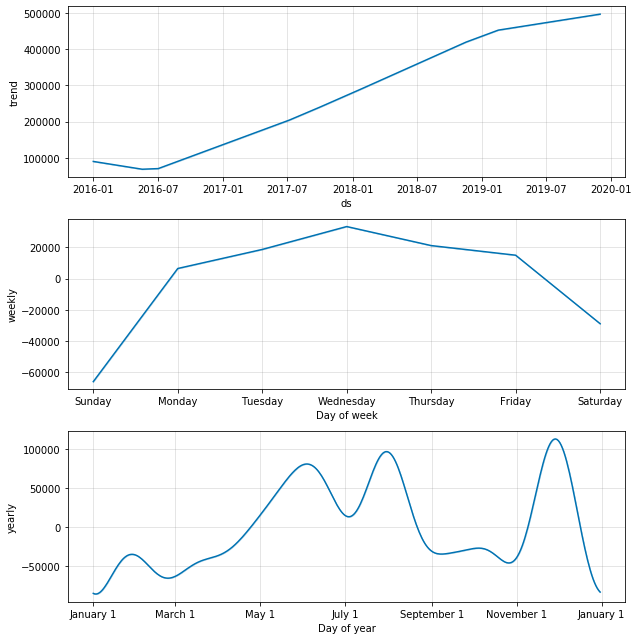

In [32]:
fig2 = m.plot_components( forecast )

In [34]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1425,2019-11-26,496296.128840,507144.962648,744279.834528,496296.128840,496296.128840,126490.788190,126490.788190,126490.788190,18748.241615,18748.241615,18748.241615,107742.546575,107742.546575,107742.546575,0.0,0.0,0.0,622786.917030
1426,2019-11-27,496449.975967,522605.286393,748838.331051,496449.975967,496449.975967,143645.661550,143645.661550,143645.661550,33439.602510,33439.602510,33439.602510,110206.059040,110206.059040,110206.059040,0.0,0.0,0.0,640095.637518
1427,2019-11-28,496603.823094,518007.255223,745695.112160,496603.823094,496603.823094,133041.294620,133041.294620,133041.294620,21230.510449,21230.510449,21230.510449,111810.784171,111810.784171,111810.784171,0.0,0.0,0.0,629645.117715
1428,2019-11-29,496757.670222,509980.136493,731153.419966,496757.670222,496757.670222,127580.151117,127580.151117,127580.151117,15049.331324,15049.331324,15049.331324,112530.819793,112530.819793,112530.819793,0.0,0.0,0.0,624337.821339
1429,2019-11-30,496911.517349,464467.381045,704617.413629,496911.517349,496911.517349,83449.551299,83449.551299,83449.551299,-28901.127371,-28901.127371,-28901.127371,112350.678669,112350.678669,112350.678669,0.0,0.0,0.0,580361.068647


In [41]:
a = df1[(df1['ds'] >= '2018-11-01') & (df1['ds'] <= '2018-11-30')]

In [42]:
a

,ds,y
477,2018-11-01,346079.85
569,2018-11-02,305249.66
1290,2018-11-03,309849.68
1247,2018-11-04,279972.55
1125,2018-11-05,358773.53
1328,2018-11-06,409554.36
764,2018-11-07,508421.64
1104,2018-11-08,479690.89
184,2018-11-09,395443.36
522,2018-11-10,379965.24


In [43]:
b = forecast[(forecast['ds'] >= '2018-11-01') & (forecast['ds'] <= '2018-11-30')]

In [45]:
b[['ds', 'yhat']]

,ds,yhat
1035,2018-11-01,393911.023768
1036,2018-11-02,390914.809826
1037,2018-11-03,350702.711873
1038,2018-11-04,317809.974856
1039,2018-11-05,395276.699130
1040,2018-11-06,412895.553136
1041,2018-11-07,433503.306244
1042,2018-11-08,427702.029174
1043,2018-11-09,428380.995568
1044,2018-11-10,391695.359577


## ARIMA

In [51]:
import numpy               as np
import pandas              as pd
import statsmodels.tsa.api as smtsa

from matplotlib                    import pyplot as plt
from statsmodels.tsa.stattools     import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [55]:
djia_df = df1.copy()

In [60]:
# ADF Test
adf_result = adfuller( djia_df.y.tolist() )
print( 'ADF Statistic: %f' % adf_result[0] )
print( 'p-value: %f' % adf_result[1] )

ADF Statistic: -1.852212
p-value: 0.354865


In [52]:
arima_obj = smtsa.ARIMA( df1['y'].tolist(), order=( 0, 2, 1 ) )
arima_obj_fit = arima_obj.fit( disp=0 )

In [61]:
# Optimize ARMA parameters
aicVal = []
for d in range( 1, 3 ):
    for ari in range( 0, 3 ):
        for maj in range( 0, 3 ):
            try:
                arima_obj = smtsa.ARIMA( djia_df['y'].tolist(), order=(ari, d, maj) )
                arima_obj_fit = arima_obj.fit()
                aicVal.append( [ari, d, maj, arima_obj_fit.aic] )
            except ValueError:
                pass
pd.DataFrame( aicVal, columns=['AR', 'd', 'MA', 'AIC'] )

,AR,d,MA,AIC
0,0,1,0,36796.974371
1,0,1,1,36611.490532
2,0,1,2,36556.074428
3,1,1,0,36656.649660
4,1,1,1,36479.366598
5,1,1,2,36472.454355
6,2,1,0,36648.593795
7,2,1,1,36468.652947
8,2,1,2,36461.224076
9,0,2,0,38086.726209


In [62]:
# Evaluating fit using optimal parameter
arima_obj = smtsa.ARIMA( djia_df['y'].tolist(), order=( 2, 1, 2 ) )
arima_obj_fit = arima_obj.fit( disp=0 )
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1427
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -18224.612
Method:                       css-mle   S.D. of innovations          85125.209
Date:                Thu, 28 Nov 2019   AIC                          36461.224
Time:                        21:01:36   BIC                          36492.804
Sample:                             1   HQIC                         36473.018
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        319.7737    222.203      1.439      0.150    -115.737     755.284
ar.L1.D.y     -0.0452      0.118     -0.383      0.702      -0.276       0.186
ar.L2.D.y      0.3850      0.058      6.583      0.000       0.270       0.500
ma.L1.D.y     -0.4379      0.121     -3.622      0.000      -0.675      -0.201
ma.L2.D.y     -0.4980      0.113     -4.419      0.000      -0.719      -0.277
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5542           +0.0000j            1.5542            0.5000
AR.2            1.6715           +0.0000j            1.6715            0.0000
MA.1            1.0440           +0.0000j            1.0440            0.0000
MA.2           -1.9234           +0.0000j            1.9234            0.5000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Forecasted value')

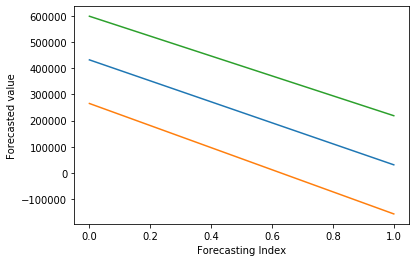

In [64]:
# Forecast and CI
f, err, ci = arima_obj_fit.forecast( 2 )
plt.plot( f )
plt.plot( ci )
plt.xlabel( 'Forecasting Index' )
plt.ylabel( 'Forecasted value' )

In [66]:
f, err, ci = arima_obj_fit.forecast( 2)

In [67]:
f

array([432008.89110762,  30620.0220418 ])

In [69]:
err

array([85125.2091271 , 95826.57188456])

In [70]:
ci

array([[ 265166.54704206,  598851.23517319],
       [-157196.60761388,  218436.65169748]])